In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 500
x0 = 50
sigma = 20
dt = 0.01
frames = 100000
x = np.arange(L)
k = 2 * np.pi * np.fft.fftfreq(L)
horizon=L//2

#k0 values
k0_values = [0.0, 0.1, 0.2, 0.5, 0.9]

#store results for each k0
results = {k0: {'time_list': [], 'x_c_list': [], 't_list': []} for k0 in k0_values}

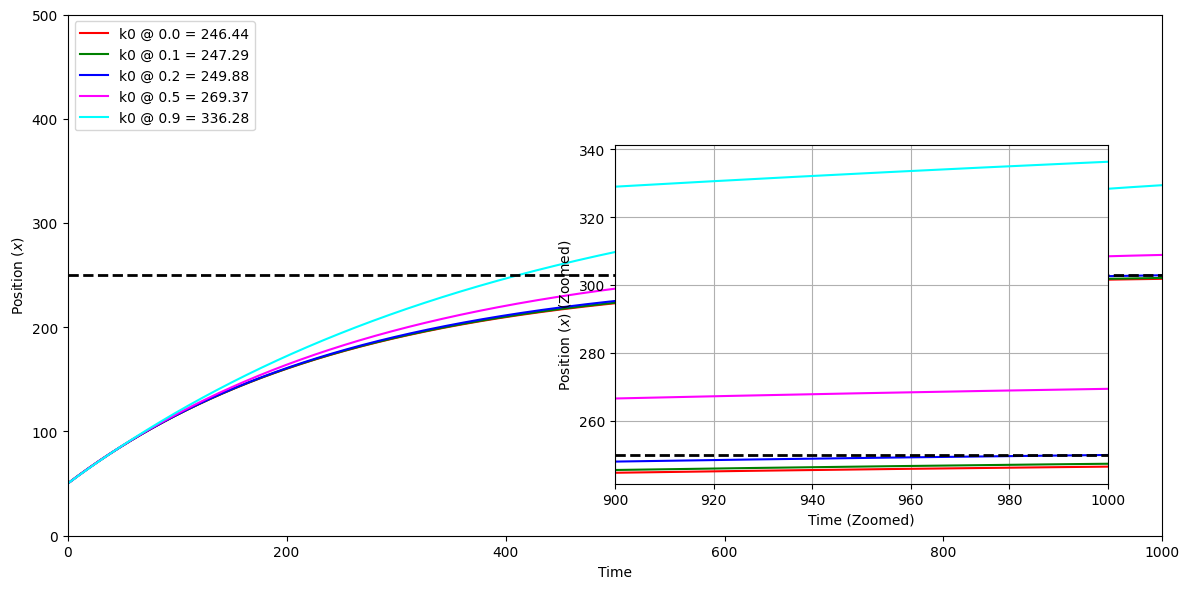

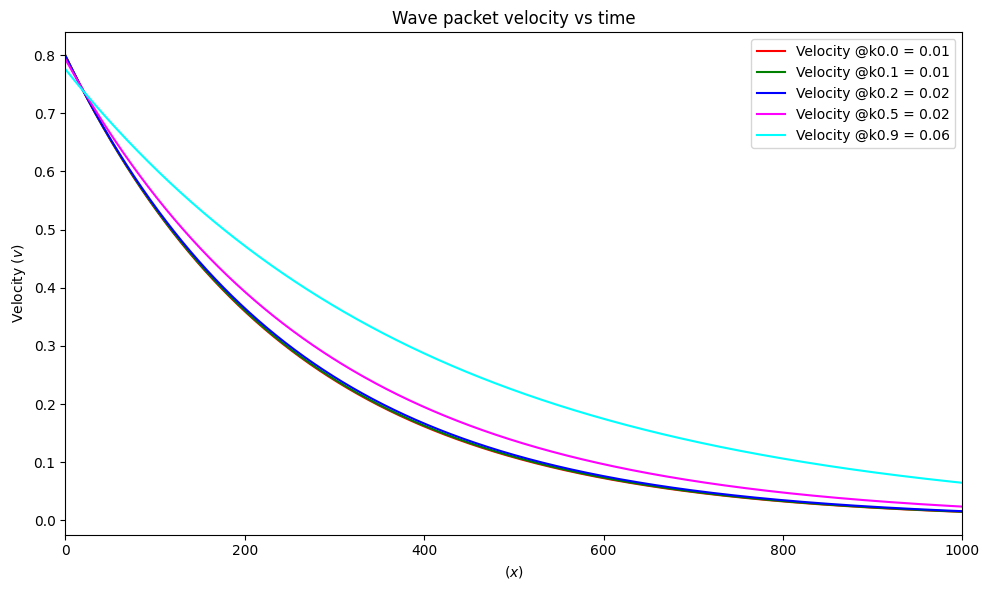

In [3]:
for k0 in k0_values:
    psi0 = np.exp(-((x - x0)**2) / (2 * sigma**2)) * np.exp(1j * k0 * (x - x0))
    psi0 /= np.sqrt(np.sum(np.abs(psi0)**2)) 

    psi = psi0.copy()
    time_list = []
    x_c_list = []
    t_list = []
    v_eff_list = []

    for frame in range(frames):
        x_c = np.sum(x * np.abs(psi)**2) / np.sum(np.abs(psi)**2) #calculate center of mass
        t = 2 * x_c / L  #linear tilt
        time_list.append(frame * dt)
        x_c_list.append(x_c)
        t_list.append(t)

        #dispersion relations
        E1 = np.sin(k) - t * np.sin(k) #first model
        E2 = 2*(np.sin(k/2)) - t*np.sin(k)  #second model

        psi_k = np.fft.fft(psi)
        psi_k *= np.exp(-1j * E2 * dt) 
        psi = np.fft.ifft(psi_k)
        psi /= np.sqrt(np.sum(np.abs(psi)**2))
        
        v1=np.cos(k)-t*np.cos(k) #1st model group velocity
        v_eff1=np.sum(np.abs(psi_k)**2*v1)/np.sum(np.abs(psi_k)**2)
        v2=np.cos(k/2)-t*np.cos(k) #2nd model group velocity
        v_eff2=np.sum(np.abs(psi_k)**2*v2)/np.sum(np.abs(psi_k)**2)
        v_eff_list.append(v_eff2)
        
    #save results for this k0
    results[k0]['time_list'] = time_list
    results[k0]['x_c_list'] = x_c_list
    results[k0]['t_list'] = t_list
    results[k0]['v_eff_list'] = v_eff_list

#plot wave packet trajectories
colors = ['red', 'green', 'blue', 'magenta', 'cyan']
plt.figure(figsize=(12, 6))

ax1 = plt.gca()  
for i, k0 in enumerate(k0_values):
    time_list = results[k0]['time_list']
    x_c_list = results[k0]['x_c_list']
    final_x_c = x_c_list[-1]
    ax1.plot(time_list, x_c_list, label=f'k0 @ {k0} = {final_x_c:.2f}', color=colors[i])

#set labels and limits for the main axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Position $(x)$')
ax1.set_xlim(0, frames * dt)
ax1.set_ylim(0, L)
ax1.axhline(horizon, color='black', linestyle='--', linewidth=2)
ax1.legend(loc='upper left')

#create a zoomed-in view for the final region
ax2 = ax1.inset_axes([0.5, 0.1, 0.45, 0.65])  # [x, y, width, height] in relative coordinates
for i, k0 in enumerate(k0_values):
    time_list = results[k0]['time_list']
    x_c_list = results[k0]['x_c_list']
    final_x_c = x_c_list[-1]
    ax2.plot(time_list, x_c_list, label=f'k0 @ {k0} = {final_x_c:.2f}', color=colors[i])

#set labels and limits for the zoomed-in
ax2.set_xlim(0.9 * frames * dt, frames * dt)
ax2.set_ylim(min([results[k0]['x_c_list'][-1] for k0 in k0_values]) - 5,
             max([results[k0]['x_c_list'][-1] for k0 in k0_values]) + 5)
ax2.axhline(horizon, color='black', linestyle='--', linewidth=2)
ax2.set_xlabel('Time (Zoomed)')
ax2.set_ylabel('Position $(x)$ (Zoomed)')
ax2.grid(True)

plt.tight_layout()
plt.savefig("FFT_1_zoomed_superimposed_with_inset.png", dpi=600, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
for i, k0 in enumerate(k0_values):
    v_eff_list=results[k0]['v_eff_list']
    time_list =results[k0]['time_list']
    final_v_eff = v_eff_list[-1]
    plt.plot(time_list, v_eff_list, label=f'Velocity @k{k0} = {final_v_eff:.2f}', color=colors[i])

plt.xlabel('$(x)$')
plt.ylabel('Velocity $(v)$')
plt.xlim(0,frames*dt)
plt.title('Wave packet velocity vs time')
plt.legend()
plt.tight_layout()
plt.savefig('Velocity_vs_time', dpi=600, bbox_inches='tight')
plt.show()